In [45]:
#Assumptions:
    #Average Household Income per Member: $12,000
    #Every member has savings portfolio of crypto, stocks, & bonds.

In [46]:
#Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [47]:
# Load .env enviroment
load_dotenv()

True

In [48]:
#Setting Monthly Household Income
monthly_income = 12000

In [49]:
#Current amount of Crypto Assets
my_btc = 1.2
my_eth = 5.3

In [50]:
#Fetching current price in USD of BTC & ETH using API endpoints provided.
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD" 

In [51]:
# Fetch current crypto prices
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()
# Compute current value of my crpto
btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
# Calculating value_of_asset = amount_of_asset*price_of_asset
my_btc_value = (my_btc)*(btc_price)
my_eth_value = (my_eth)*(eth_price)
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}") 

The current value of your 1.2 BTC is $13934.56
The current value of your 5.3 ETH is $2072.83


In [52]:
total_crypto_value = my_btc_value+my_eth_value
total_crypto_value

16007.385999999999

In [53]:
#### Collecting Investment Data Using Alpaca

In [54]:
#Current Amount of Shares
my_agg = 200
my_spy = 50

In [55]:
#Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Create Alpaca API object
api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [56]:
#Format current date as ISO format
current_date = pd.Timestamp("2020-08-18", tz="America/New_York").isoformat()

#Set Tickers
tickers = ['AGG','SPY']

#Set timeframe to '1D' for Alpaca API
timeframe = '1D'

#Get current closing prices for SPY & AGG
df_ticker = api.get_barset(tickers,timeframe,start=current_date,end=current_date).df

#Pick AGG & SPY close prices
agg_close_price = df_ticker['AGG']['close'].values[0]
spy_close_price = df_ticker['SPY']['close'].values[0]

#Print AGG & SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.54
Current SPY closing price: $338.62


In [57]:
#Compute the current value of shares
my_spy_value = (my_spy)*(spy_close_price)
my_agg_value = (my_agg)*(agg_close_price)
total_shares_value = my_spy_value+my_agg_value
#Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16931.00
The current value of your 200 AGG shares is $23708.00


In [58]:
#Create savings DataFrame
df_savings = pd.DataFrame(data={'amount':[total_crypto_value,total_shares_value]},
                         index=['crypto','shares'])

#Display savings DataFrame
display(df_savings)

,amount
crypto,16007.386
shares,40639.000


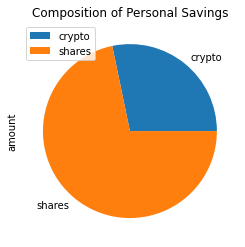

In [59]:
#Plot savings pie chart
df_savings.plot(kind='pie',y='amount',title='Composition of Personal Savings')

In [60]:
#Set ideal emergency fund
emergency_fund = monthly_income * 3

#Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value

#Validate health of savings
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("Uh-oh! Keep saving!")

Congratulations! You have enough money in your emergency fund.


In [61]:
#### PART TWO - RETIREMENT PLANNING ####
######## MONTE CARLO SIMULATION ########

In [62]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [63]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(tickers,timeframe,start=start_date,end=end_date).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [64]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

#Creating DF object with even distribution and returns column using MCFtool.
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

#Running MC simulation.
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011337,0.997874,1.002715,1.007102,0.997766,1.005193,0.991415,1.007734,0.998130,1.005225,...,1.022007,0.997834,1.005613,0.990689,0.999436,1.008171,1.007615,1.012871,1.003011,1.010233
2,1.018507,0.998729,1.008038,1.018073,0.997979,1.004717,0.989438,1.004570,0.994313,0.992607,...,1.024870,0.989093,1.003555,0.993725,1.004454,1.004351,1.000454,1.013012,1.006823,1.008341
3,1.025960,1.004019,1.005503,1.027475,0.994672,0.993916,0.980154,1.011241,1.003411,0.991763,...,1.033232,0.991191,0.999726,1.007333,0.999504,0.993835,1.003792,1.016299,0.997680,1.004404
4,1.027654,0.998803,1.005760,1.039620,1.005459,0.988579,0.985378,1.015725,1.006779,0.992262,...,1.032728,0.989449,0.997458,1.009468,0.988884,1.000589,0.998147,1.018357,1.003198,1.003680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.729279,4.134365,6.285798,3.656418,10.514225,6.807132,15.917938,5.169485,5.906564,2.846777,...,19.079406,5.925444,5.098214,7.599397,13.658994,2.609980,4.720766,13.729639,3.283869,5.598755
7557,2.678349,4.143563,6.336883,3.665335,10.500118,6.821921,16.058182,5.157238,5.869124,2.866678,...,19.051426,5.895540,5.123021,7.685319,13.639327,2.606903,4.719900,13.839318,3.286593,5.577855
7558,2.643985,4.133760,6.315923,3.653913,10.541052,6.806759,15.927001,5.167271,5.821033,2.845846,...,19.123946,5.875594,5.095101,7.725678,13.631279,2.602388,4.688455,13.888543,3.267017,5.581397
7559,2.664206,4.122158,6.299365,3.640704,10.382092,6.838204,15.965276,5.143399,5.834078,2.864234,...,19.110843,5.863611,5.064146,7.705612,13.753683,2.597317,4.685168,13.811700,3.286074,5.566381


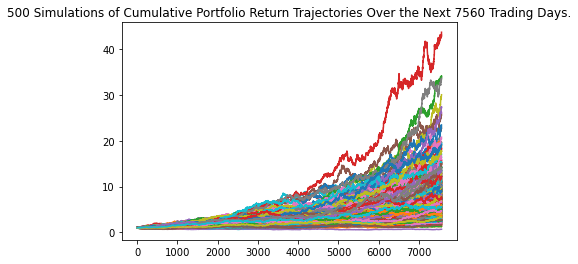

In [65]:
#Simulation outcomes
line_plot = MC_even_dist.plot_simulation()
line_plot

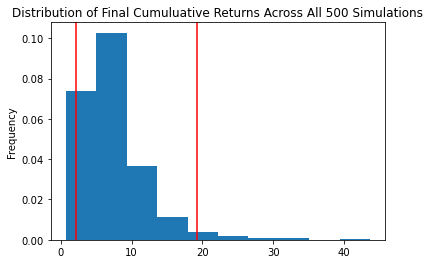

In [66]:
#Probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()
dist_plot

In [67]:
# Summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

print(even_tbl)

count           500.000000
mean              7.446060
std               4.802916
min               0.686950
25%               4.411579
50%               6.432691
75%               9.136880
max              43.695702
95% CI Lower      2.096669
95% CI Upper     19.211585
Name: 7560, dtype: float64


In [68]:
# Initial investment
initial_investment = 20000

# Lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of $20,000
ci_lower = initial_investment * even_tbl[8]
ci_upper = initial_investment * even_tbl[9]

# Results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.2f} and ${ci_upper:.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41933.39 and $384231.69


In [69]:
######## OPTIONAL CHALLENGE ########
######### EARLY RETIREMENT #########

In [70]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

#Creating DF object with even distribution and returns column using MCFtool.
MC_even_dist5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*5
)

#Running MC simulation.
MC_even_dist5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998928,1.003210,1.006036,1.000723,1.001357,1.005311,1.002553,1.011208,1.007810,0.999208,...,1.010995,0.990379,0.997957,1.000717,0.992903,1.010906,1.002210,1.005201,0.995052,1.003018
2,1.005905,1.003826,1.011948,0.992143,1.004397,0.999453,1.017428,1.017612,1.004746,0.999732,...,1.017454,1.000577,0.993298,1.009859,0.994846,1.013321,1.001128,1.003043,0.996330,1.006892
3,1.002946,1.000000,1.014488,0.997704,1.005427,1.016111,1.025191,1.017842,1.014420,0.996092,...,1.025162,1.016229,1.000908,1.024673,0.987066,1.019766,1.002894,1.008885,0.994486,1.000459
4,0.994076,0.997764,1.024538,1.000421,1.001216,1.025183,1.021786,1.015261,1.017539,1.000473,...,1.018286,1.012941,1.000487,1.032901,0.984561,1.019238,1.000878,1.010796,0.992494,0.992840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.357652,1.418565,1.754498,1.204372,1.369990,1.677217,1.335926,1.668519,2.103615,1.046308,...,1.143056,1.617233,0.900912,1.782724,1.401140,1.053571,1.928568,2.077368,1.145410,1.305813
1257,1.356758,1.410606,1.735892,1.207749,1.368246,1.694347,1.347768,1.656972,2.114165,1.037231,...,1.137196,1.597495,0.900145,1.774896,1.395727,1.044865,1.933819,2.064875,1.154584,1.295920
1258,1.353622,1.389798,1.727687,1.220151,1.370046,1.693757,1.340867,1.650567,2.135582,1.028274,...,1.138038,1.601782,0.907476,1.756784,1.390202,1.038596,1.951686,2.082433,1.156976,1.301496
1259,1.350105,1.393334,1.726490,1.214241,1.366706,1.673079,1.326763,1.659939,2.147674,1.033720,...,1.147949,1.588255,0.912036,1.753664,1.395311,1.047144,1.943134,2.091146,1.145114,1.313411


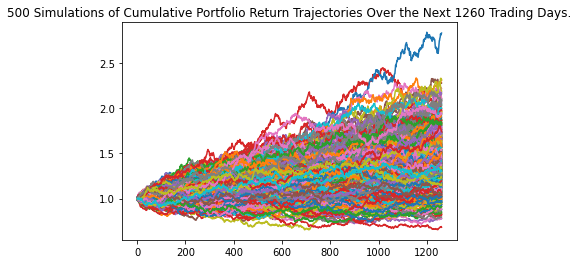

In [71]:
# Simulation outcomes
line_plot5yr = MC_even_dist5yr.plot_simulation()

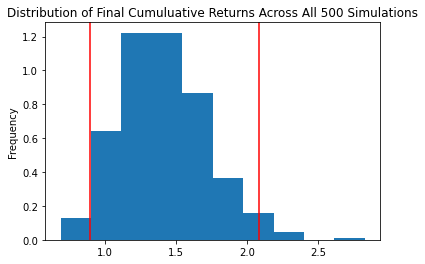

In [72]:
# Probability distribution and confidence intervals
dist_plot5yr = MC_even_dist5yr.plot_distribution()

In [73]:
# Summary statistics from the Monte Carlo simulation results
tbl_five = MC_even_dist5yr.summarize_cumulative_return()

# Printed summary statistics
print(tbl_five)

count           500.000000
mean              1.407478
std               0.306426
min               0.684303
25%               1.195371
50%               1.379251
75%               1.606337
max               2.827592
95% CI Lower      0.888486
95% CI Upper      2.081123
Name: 1260, dtype: float64


In [74]:
# Initial investment
initial_investment = 20000

# Lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of $20,000
ci_lower_five = initial_investment * tbl_five[8]
ci_upper_five = initial_investment * tbl_five[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:.2f} and ${ci_upper_five:.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17769.72 and $41622.46


In [75]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

#Creating DF object with even distribution and returns column using MCFtool.
MC_even_dist10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*10
)

#Running MC simulation.
MC_even_dist10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991824,0.999631,0.997550,0.999154,1.001795,0.998513,1.001756,1.008986,0.989397,0.996854,...,1.002439,1.006738,1.004485,1.001666,1.000841,0.994750,1.010796,1.006371,0.995275,1.014996
2,0.987378,0.999094,0.998807,0.997512,1.004775,0.999214,0.999760,1.002631,0.991657,1.002457,...,1.000930,1.015530,1.000150,1.009020,1.008525,0.991074,1.006495,1.008444,0.987511,1.008543
3,0.980716,0.996098,0.992546,0.994532,1.004990,1.006645,1.000280,0.999672,0.976813,0.997744,...,0.993765,1.024463,1.010523,1.015603,1.013550,0.999105,0.999050,1.010650,0.982834,1.007545
4,0.979182,0.998193,0.991298,0.994165,1.013415,1.005873,1.002720,1.002718,0.985144,0.996935,...,1.001613,1.024000,1.011002,1.016492,1.007367,1.003061,1.009158,1.012388,0.989184,1.004306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.841459,2.558809,1.710851,1.506388,2.740768,1.747318,2.271166,3.746723,1.032382,2.465711,...,1.699307,3.004888,2.146637,2.984618,3.985544,2.927913,1.112692,2.321928,1.999876,2.088640
2517,1.828552,2.548543,1.713929,1.508300,2.765915,1.743276,2.266255,3.763652,1.026373,2.462481,...,1.695719,2.982261,2.149916,2.981973,3.952758,2.899129,1.109327,2.317090,1.996067,2.092142
2518,1.825522,2.541520,1.707725,1.507368,2.767005,1.743028,2.247073,3.786042,1.033250,2.446041,...,1.687330,2.970885,2.146955,2.968773,3.962464,2.918407,1.105004,2.333243,1.991326,2.081337
2519,1.827395,2.512425,1.715250,1.509662,2.763292,1.734288,2.238110,3.812952,1.030446,2.425344,...,1.689821,2.978113,2.153799,2.950257,3.960699,2.935189,1.107730,2.342319,1.979701,2.076559


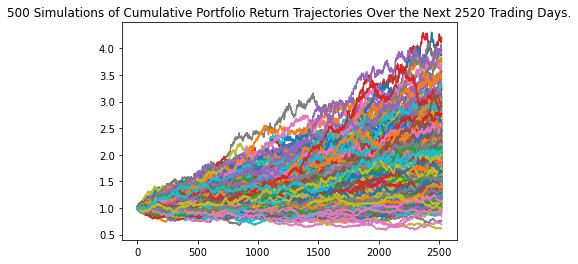

In [76]:
# Simulation outcomes
line_plot10yr = MC_even_dist10yr.plot_simulation()

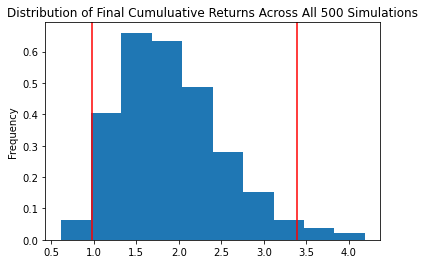

In [77]:
# Probability distribution and confidence intervals
dist_plot10yr = MC_even_dist10yr.plot_distribution()

In [78]:
# Summary statistics from the Monte Carlo simulation results
tbl_ten = MC_even_dist10yr.summarize_cumulative_return()

# Printed summary statistics
print(tbl_ten)

count           500.000000
mean              1.910472
std               0.618125
min               0.611166
25%               1.466997
50%               1.838558
75%               2.226356
max               4.186014
95% CI Lower      0.980215
95% CI Upper      3.385107
Name: 2520, dtype: float64


In [79]:
# Initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = initial_investment * tbl_ten[8]
ci_upper_ten = initial_investment * tbl_ten[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:.2f} and ${ci_upper_ten:.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $19604.31 and $67702.14
